# Scaling with the MinMaxScaler

We will be using the Min Max Scaler on the absenteeism dataset in this notebook. The minmax scaler takes in the range in which you want your data to lie and scales your existing data to this range

In [1]:
import pandas as pd
import numpy as np

import math

from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler, minmax_scale

### Absenteeism dataset

In [3]:
data = pd.read_csv('Datasets/absenteeism_processed.csv')

In [4]:
data.head()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
0,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,4.0
1,118.0,13.0,18.0,50.0,239.554,98.0,178.0,31.0,0.0
2,179.0,51.0,18.0,38.0,239.554,89.0,170.0,31.0,2.0
3,279.0,5.0,14.0,39.0,239.554,68.0,168.0,24.0,4.0
4,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,2.0


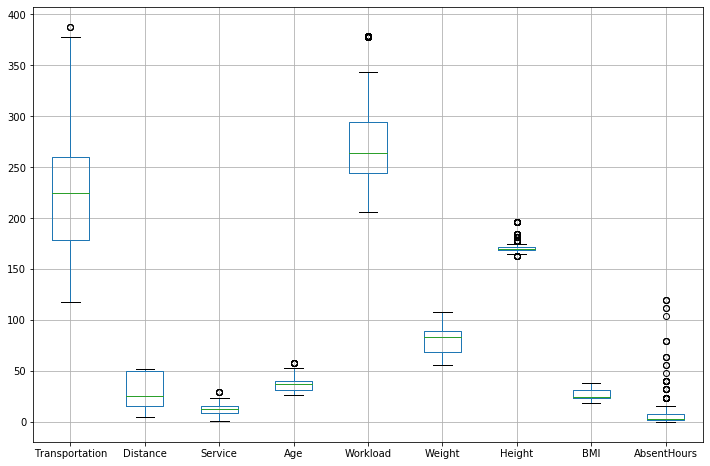

In [5]:
data.boxplot(figsize=(12, 8))

### MinMaxScaler
- Deafault calues lie between 0-1 range
- MinMax Scale function allows us to specify the range to transform the data


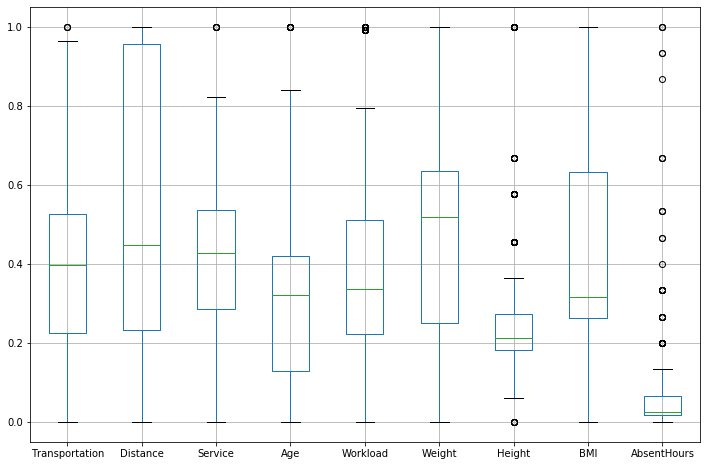

In [7]:
scaled_data = pd.DataFrame(minmax_scale(data), columns=data.columns)

scaled_data.boxplot(figsize=(12, 8))

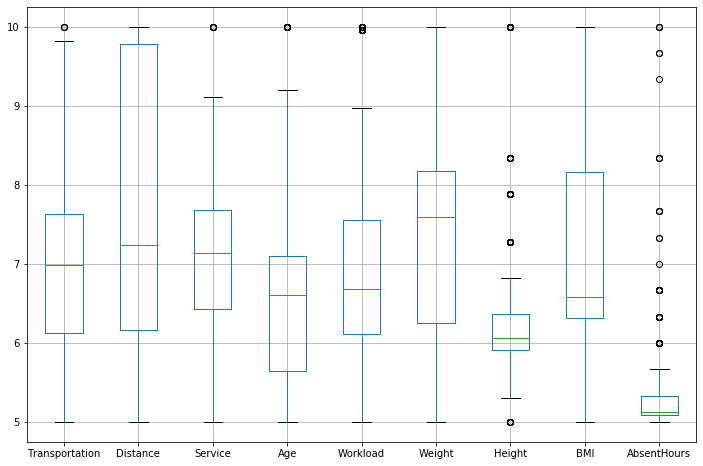

In [8]:
scaled_data = pd.DataFrame(minmax_scale(data, feature_range=(5, 10)), columns=data.columns)

scaled_data.boxplot(figsize=(12, 8))

To see how the MinMaxScaler works under the hood we will focus on scaling oen feature and comparing it side by side

In [9]:
height_data = pd.DataFrame(data['Height'], columns=['Height'])

height_data.head()

,Height
0,172.0
1,178.0
2,170.0
3,168.0
4,172.0


In [10]:
height_data['scaled'] = scale(height_data)

height_data.head()

,Height,scaled
0,172.0,-0.019046
1,178.0,0.975828
2,170.0,-0.350671
3,168.0,-0.682295
4,172.0,-0.019046


In [11]:
range_max = 100
range_min = 0

height_max = height_data['Height'].max()
height_min = height_data['Height'].min()

This is the matematical formula that is applied to the data to scale it to the given range:
    
X_scaled = $ (X - X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))*(max-min)+min $

In [12]:
height_data['range_scaled'] = ((height_data['Height'] - height_min) / (height_max - height_min)) *  \
                            (range_max - range_min) +  \
                            range_min

height_data.head()

,Height,scaled,range_scaled
0,172.0,-0.019046,27.272727
1,178.0,0.975828,45.454545
2,170.0,-0.350671,21.212121
3,168.0,-0.682295,15.151515
4,172.0,-0.019046,27.272727


In [13]:
height_data['minmax_scaled'] = minmax_scale(height_data['Height'], feature_range=(0, 100))

height_data.head()

,Height,scaled,range_scaled,minmax_scaled
0,172.0,-0.019046,27.272727,27.272727
1,178.0,0.975828,45.454545,45.454545
2,170.0,-0.350671,21.212121,21.212121
3,168.0,-0.682295,15.151515,15.151515
4,172.0,-0.019046,27.272727,27.272727


As you can see our manual calculations and the minmax scaler produced the same results

We can also use the MinMaxScaler API to produce the same results as above

In [14]:
minmax_scaler = MinMaxScaler(feature_range=(0, 100))

In [15]:
height_data['minmax_estimator_scaled'] = \
    minmax_scaler.fit_transform(height_data['Height'].values.reshape(-1, 1))

height_data.head()

,Height,scaled,range_scaled,minmax_scaled,minmax_estimator_scaled
0,172.0,-0.019046,27.272727,27.272727,27.272727
1,178.0,0.975828,45.454545,45.454545,45.454545
2,170.0,-0.350671,21.212121,21.212121,21.212121
3,168.0,-0.682295,15.151515,15.151515,15.151515
4,172.0,-0.019046,27.272727,27.272727,27.272727
